<font size="5">Udacity Machine Learning Nanodegree Capstone Project Benchmark Model</font>


<font size="5">Steve Tsiolis</font>

<font size="5">Download images</font>


In [ ]:
#Using the download script supplied on the kaggle Google landmarks challenge
from download_script import fetch
#Download the image sets in the respective folders
#For anyone running this - you can run it multiple times, it won't download something which is already downloaded
train_pics = fetch('info/p_train.csv', 'Download_pic/train_set')
validation_pics = fetch('info/p_validation.csv', 'Download_pic/validation_set')
test_pics = fetch('info/p_test.csv', 'Download_pic/test_set')

<font size="5">Pre Processing Data</font>

In [2]:
#preprocessing 
from keras.preprocessing.image import ImageDataGenerator

#Rescaling between [0,1] interval from [0,255]
train_datagen = ImageDataGenerator(rescale=1. /255)

#Creating generators noting with (224,224) target size
train_generator = train_datagen.flow_from_directory('Download_pic/train_set/',target_size=(224, 224),batch_size=1)

validation_generator = train_datagen.flow_from_directory('Download_pic/validation_set/',target_size=(224, 224),batch_size=1)

test_generator = train_datagen.flow_from_directory('Download_pic/test_set/',target_size=(224, 224),batch_size=1)


Using TensorFlow backend.


Found 1067 images belonging to 140 classes.
Found 277 images belonging to 140 classes.
Found 277 images belonging to 140 classes.


<font size="5">Architecture</font>


In [3]:
#Architecture taken from deep learning assignment
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=2, padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=16, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(140,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(140,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 8)       104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 16)      528       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        8256      
__________

<font size="5">Compile and train the model</font>


In [4]:
#Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [5]:
from keras.callbacks import ModelCheckpoint 
#Create checkpoint file to use for testing test data
callback_file = ModelCheckpoint(filepath='saved_models/weights.best.benchmark.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
#Run model for 50 epochs
epoch_graph = model.fit_generator(train_generator,epochs=50,steps_per_epoch= 1067,validation_data=validation_generator,validation_steps=277,callbacks=[callback_file])



Epoch 1/50
1067/1067 [==============================] - 39s 36ms/step - loss: 4.9703 - acc: 0.0047 - val_loss: 4.9425 - val_acc: 0.0072
Epoch 2/50
1067/1067 [==============================] - 37s 34ms/step - loss: 4.9618 - acc: 0.0037 - val_loss: 4.9434 - val_acc: 0.0072
Epoch 3/50
1067/1067 [==============================] - 37s 35ms/step - loss: 4.9606 - acc: 0.0084 - val_loss: 4.9392 - val_acc: 0.0144
Epoch 4/50
1067/1067 [==============================] - 37s 35ms/step - loss: 4.9491 - acc: 0.0112 - val_loss: 4.9386 - val_acc: 0.0144
Epoch 5/50
1067/1067 [==============================] - 37s 35ms/step - loss: 4.9363 - acc: 0.0122 - val_loss: 4.9063 - val_acc: 0.0108
Epoch 6/50
1067/1067 [==============================] - 39s 37ms/step - loss: 4.9026 - acc: 0.0122 - val_loss: 4.8679 - val_acc: 0.0144
Epoch 7/50
1067/1067 [==============================] - 38s 36ms/step - loss: 4.8099 - acc: 0.0159 - val_loss: 4.8140 - val_acc: 0.0144
Epoch 8/50
1067/1067 [==========================

<font size="5">When did the model accuracy plateu?</font>

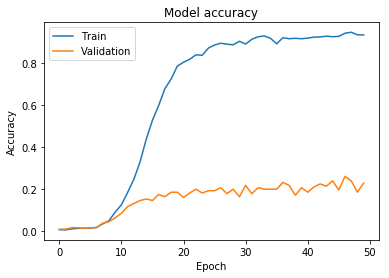

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(epoch_graph.history['acc'])
plt.plot(epoch_graph.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<font size="5">Test the accuracy using the test data</font>

In [10]:
#Loading the best checkpoint weight file
model.load_weights('saved_models/weights.best.benchmark.hdf5')

In [11]:
acc = model.evaluate_generator(test_generator, 140)[1]

print("The accuracy for the benchmark model is: ",acc*100, "%")

The accuracy for the benchmark model is:  28.5714285714 %
